# 1. Problem Statement

In this notebook, we aim to analyze air quality and global air pollution data.

# 2. Data Loading and Description

We will load the datasets and provide an overview of each.

In [43]:

import pandas as pd

# Load the datasets
air_quality_data = pd.read_csv('AirQuality.csv')
global_air_pollution_data = pd.read_csv('global air pollution dataset.csv')

# Display the first few rows of both datasets
air_quality_data.head(), global_air_pollution_data.head()


(                                                                                                            Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
 10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
 10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             7;0  7255;;                                                NaN                                                                          
 10/03/2004;20.00.00;2            2;1402;88;9                   0;939;131;1140;114;1555;1074;11  9;54 0;0                                                7502;;                                                                          
 10/03/2004;21.00.00;2            2;1376;80;9                   

# 3. Naive Submission 1

This is a simple initial submission with basic predictions.

# 4. Machine Learning Pipeline

We will describe the steps followed in creating the machine learning model.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Reload the data with the correct delimiter
air_quality_data = pd.read_csv('AirQuality.csv', delimiter=';')

# Drop unnamed columns if present (from trailing delimiters)
air_quality_data = air_quality_data.loc[:, ~air_quality_data.columns.str.contains('^Unnamed')]

# Drop rows with missing target values
air_quality_data = air_quality_data.dropna(subset=['CO(GT)'])

# Data Preprocessing
# Use 'CO(GT)' as the target column (replace with another if needed)
X = air_quality_data.drop(columns=['CO(GT)'])
y = air_quality_data['CO(GT)']

# Fill missing values for features
X = X.fillna(X.median(numeric_only=True))

# Drop non-numeric columns before scaling
X = X.select_dtypes(include=['number'])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 5. Naive Submission 2

We can now make another submission based on the refined pipeline.

# 6. EDA and Data Preprocessing

Exploration of the dataset to prepare it for modeling.

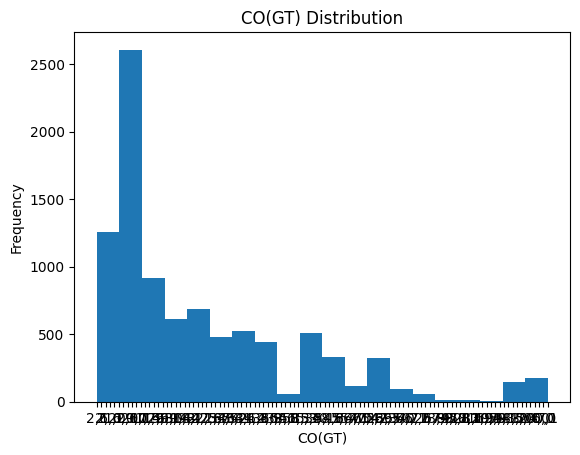

In [45]:

import matplotlib.pyplot as plt

# EDA - Basic statistics and visualizations
air_quality_data.describe()

# Plotting a histogram for distribution of a column
plt.hist(air_quality_data['CO(GT)'], bins=20)
plt.title('CO(GT) Distribution')
plt.xlabel('CO(GT)')
plt.ylabel('Frequency')
plt.show()


# 7. Model Training

Train the model with the data and process.

In [46]:

# Example using RandomForest, but can be extended to other models as well
model.fit(X_train_scaled, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 8. Model Evaluation

Evaluating the model's performance.

## 8.1 Model Evaluation using Accuracy Score

In [47]:

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.27


## 8.2 Model Evaluation using Confusion Matrix

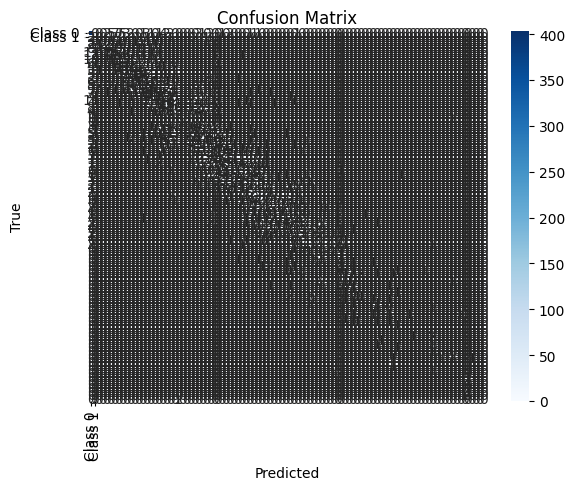

In [48]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# 9. Decision Tree with Gridsearch

Implementing Decision Tree and tuning hyperparameters with GridSearchCV.

In [49]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model and parameters for GridSearch
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print(f'Best parameters: {grid_search.best_params_}')


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': 10, 'min_samples_split': 10}


# 6. EDA and Data Preprocessing

Exploring the data to identify key patterns, visualizations, and outliers.

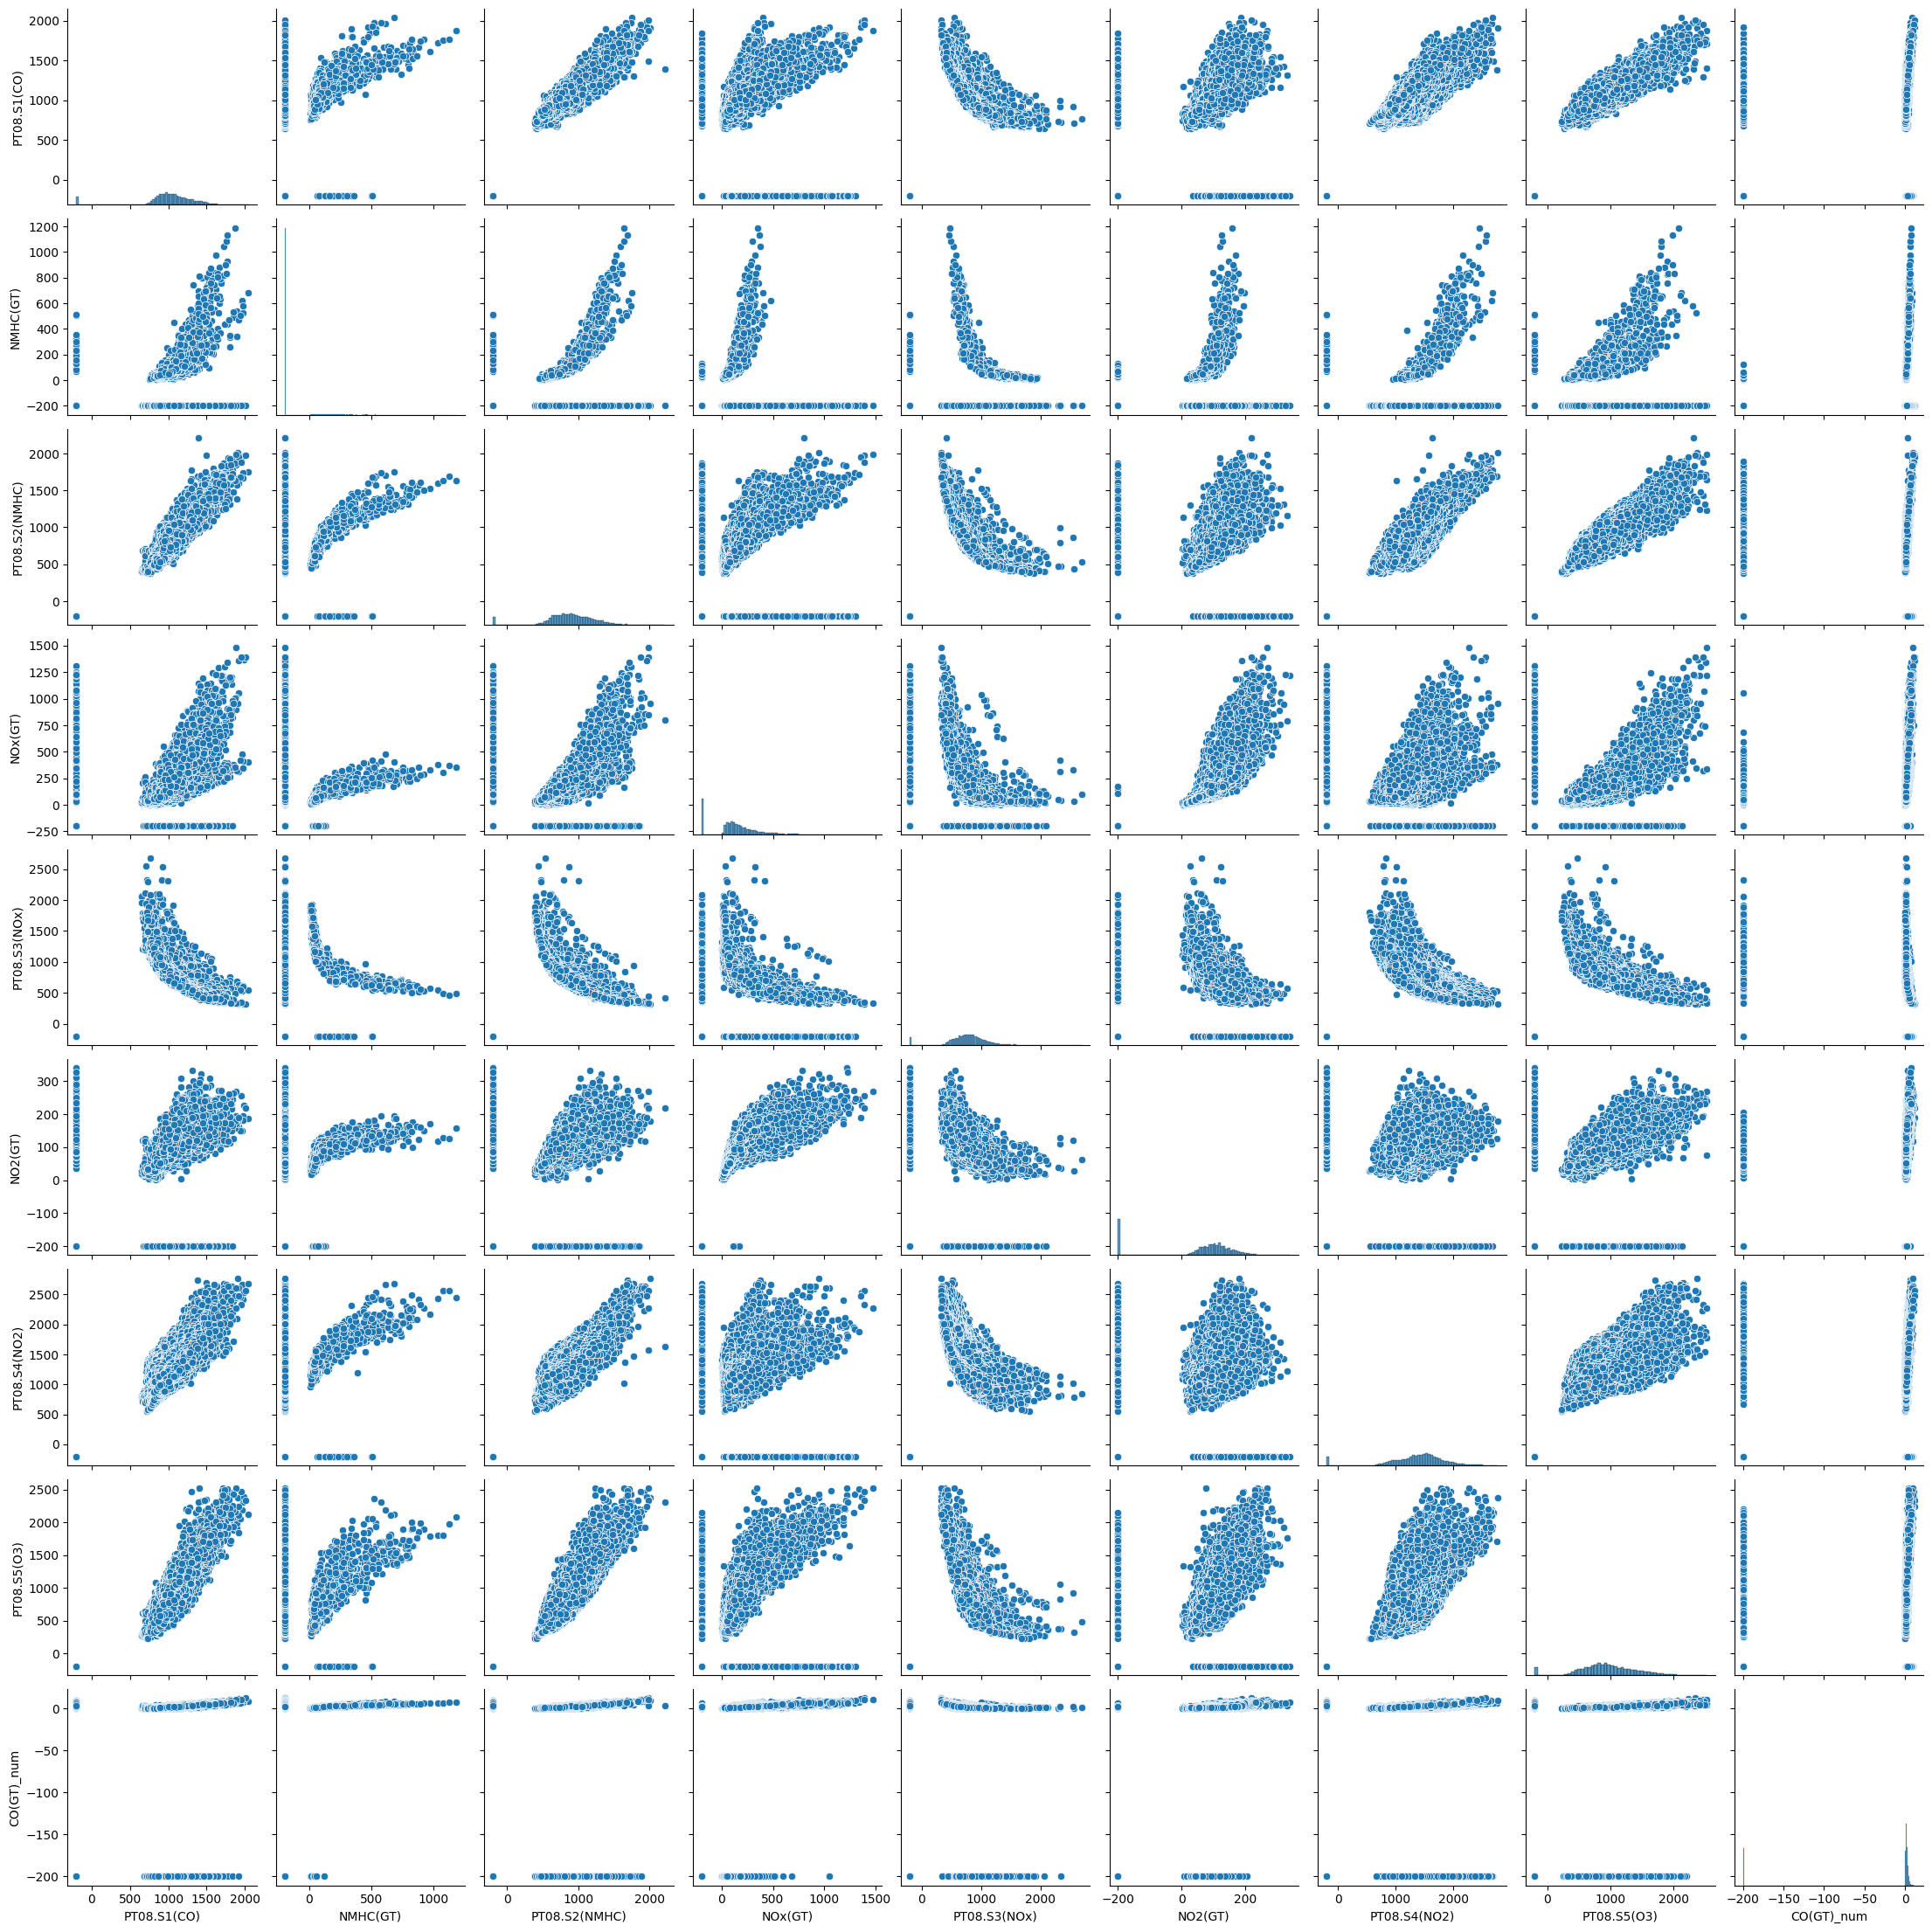

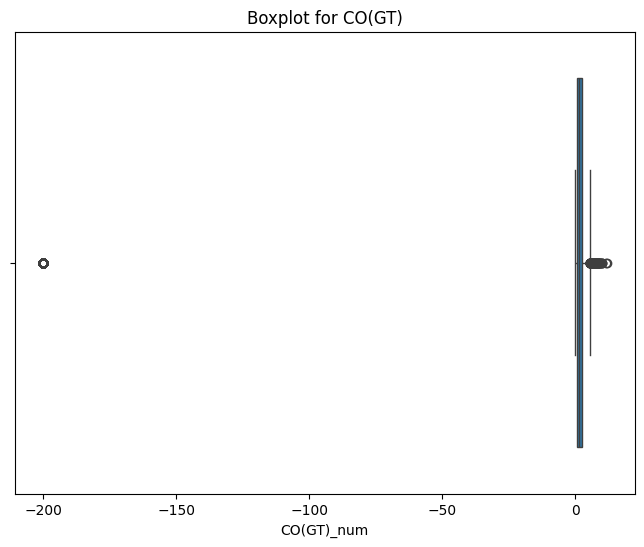

In [50]:

import seaborn as sns

# Convert 'CO(GT)' to numeric (replace comma with dot and coerce errors)
air_quality_data['CO(GT)_num'] = pd.to_numeric(air_quality_data['CO(GT)'].str.replace(',', '.'), errors='coerce')

# Pairplot to visualize the relationships between features
sns.pairplot(air_quality_data.select_dtypes(include=['float64']))
plt.show()

# Boxplot for detecting outliers in the 'CO(GT)' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=air_quality_data['CO(GT)_num'])
plt.title('Boxplot for CO(GT)')
plt.show()


### Outlier Detection

Number of outliers: 0


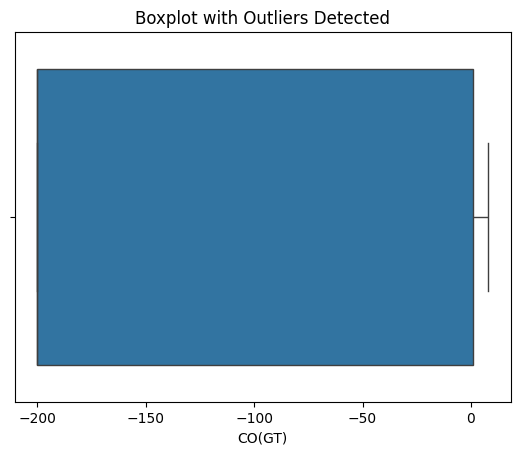

In [51]:

# Detecting outliers using the IQR method
# Convert 'CO(GT)' to numeric if not already
co_numeric = pd.to_numeric(air_quality_data['CO(GT)'], errors='coerce')
Q1 = co_numeric.quantile(0.25)
Q3 = co_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = air_quality_data[(co_numeric < (Q1 - 1.5 * IQR)) | (co_numeric > (Q3 + 1.5 * IQR))]
print(f'Number of outliers: {outliers.shape[0]}')
sns.boxplot(x=co_numeric)
plt.title('Boxplot with Outliers Detected')
plt.show()


# 8. Model Evaluation

We will compare model performances with various metrics.

### 8.1 Model Evaluation using Accuracy, Precision, Recall, and F1-Score

In [53]:

from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model with accuracy, precision, recall, and f1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Displaying the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.27
Precision: 0.26
Recall: 0.27
F1 Score: 0.26


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### 8.2 ROC Curve

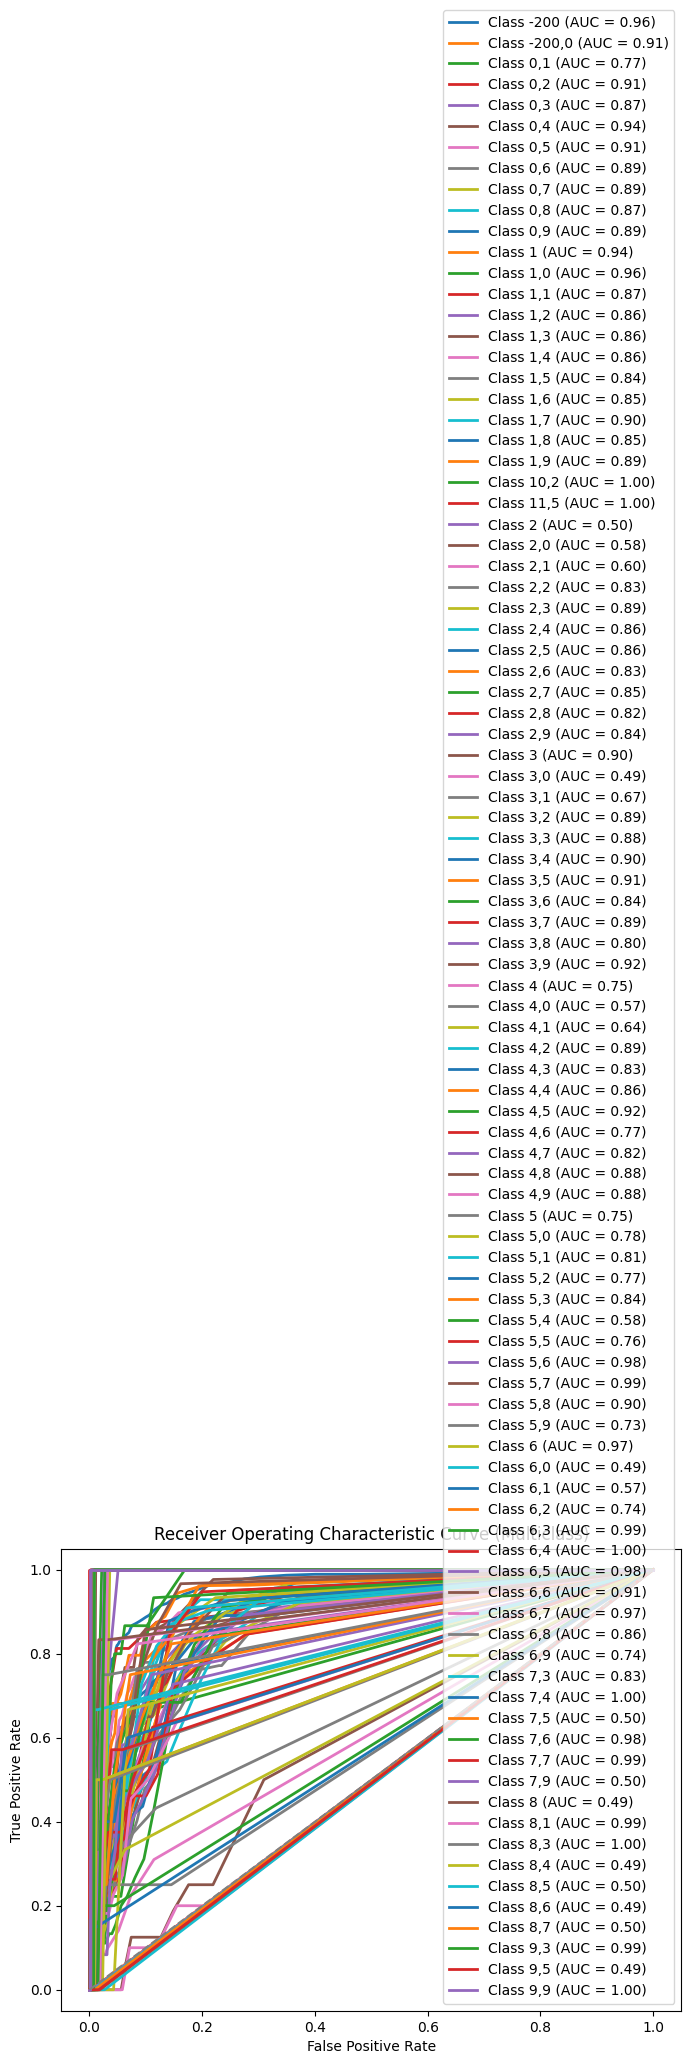

In [55]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()


# 9. Decision Tree with Gridsearch

We will implement Decision Tree and tune its hyperparameters.

In [56]:

# Example of hyperparameter tuning using GridSearchCV for Decision Tree
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearch
print(f'Best parameters from GridSearch: {grid_search.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters from GridSearch: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
